In [2]:
library(tidyverse)
library(readr)
library(haven)
library(lubridate)
library(ggplot2)
yt <- read_csv("/Users/gracepanos/Desktop/youtube-new/USvideos.csv")

Parsed with column specification:
cols(
  video_id = col_character(),
  trending_date = col_character(),
  title = col_character(),
  channel_title = col_character(),
  category_id = col_double(),
  publish_time = col_datetime(format = ""),
  tags = col_character(),
  views = col_double(),
  likes = col_double(),
  dislikes = col_double(),
  comment_count = col_double(),
  thumbnail_link = col_character(),
  comments_disabled = col_logical(),
  ratings_disabled = col_logical(),
  video_error_or_removed = col_logical(),
  description = col_character()
)
Warning message:
“1533544 parsing failures.
row  col           expected actual                                                 file
  2 tags delimiter or quote      | '/Users/gracepanos/Desktop/youtube-new/USvideos.csv'
  2 tags delimiter or quote      l '/Users/gracepanos/Desktop/youtube-new/USvideos.csv'
  2 tags delimiter or quote      | '/Users/gracepanos/Desktop/youtube-new/USvideos.csv'
  2 tags delimiter or quote      j '/Users/gr

In [7]:
y <- yt$publish_time

data <- mutate(yt, new_date = ydm(trending_date), new_publish_date = format(as.POSIXct(y,format='%Y-%m-%d T %H:%M:%S Z'),format='%Y-%m-%d'))

data$date_diff <- as.Date(as.character(data$new_date), format='%Y-%m-%d')-
                  as.Date(as.character(data$new_publish_date), format='%Y-%m-%d')

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	40949 obs. of  16 variables:
 $ video_id              : chr  "2kyS6SvSYSE" "1ZAPwfrtAFY" "5qpjK5DgCt4" "puqaWrEC7tY" ...
 $ trending_date         : chr  "17.14.11" "17.14.11" "17.14.11" "17.14.11" ...
 $ title                 : chr  "WE WANT TO TALK ABOUT OUR MARRIAGE" "The Trump Presidency: Last Week Tonight with John Oliver (HBO)" "Racist Superman | Rudy Mancuso, King Bach & Lele Pons" "Nickelback Lyrics: Real or Fake?" ...
 $ channel_title         : chr  "CaseyNeistat" "LastWeekTonight" "Rudy Mancuso" "Good Mythical Morning" ...
 $ category_id           : num  22 24 23 24 24 28 24 28 1 25 ...
 $ publish_time          : POSIXct, format: "2017-11-13 17:13:01" "2017-11-13 07:30:00" ...
 $ tags                  : chr  "SHANtell martin" "last week tonight trump presidency\"|\"last week tonight donald trump\"|\"john oliver trump\"|\"donald trump" "racist superman\"|\"rudy\"|\"mancuso\"|\"king\"|\"bach\"|\"racist\"|\"superman\"|\"lov

In [10]:
length(unique(data$title))
nrow(data)
clean <- data %>% distinct(title, .keep_all = TRUE)

[1] 6455

[1] 40949

Warning message:
“Removed 166 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

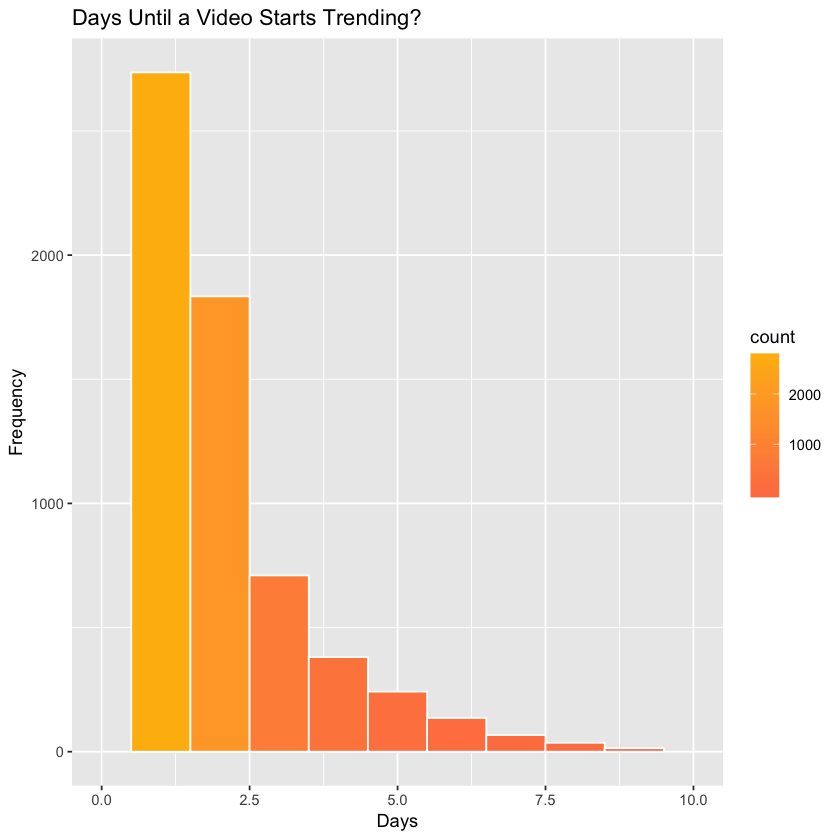

In [11]:
x <- as.numeric(clean$date_diff)

ggplot(clean, aes(x=x)) + geom_histogram(binwidth= 1, color='white', aes(fill=..count..)) + labs(title = 'Days Until a Video Starts Trending?', x='Days', y='Frequency') + xlim(0,10) + scale_fill_gradient('count', low='coral', high='darkgoldenrod1')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    2.00   22.27    3.00 4215.00 

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,new_date,new_publish_date,date_diff
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,FALSE,FALSE,FALSE,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-14,2017-11-13,1 days
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency""|""last week tonight donald trump""|""john oliver trump""|""donald trump",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,FALSE,FALSE,FALSE,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",2017-11-14,2017-11-13,1 days
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman""|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,FALSE,FALSE,FALSE,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.c

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,new_date,new_publish_date,date_diff
MJO3FmmFuh4,18.05.02,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23 08:24:11,"Budweiser""|""Bud""|""Whazzup""|""ad",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,FALSE,FALSE,FALSE,"Original Whazzup ad - however, there is a little *glitch* in the middle...sorry.",2018-02-05,2006-07-23,4215 days


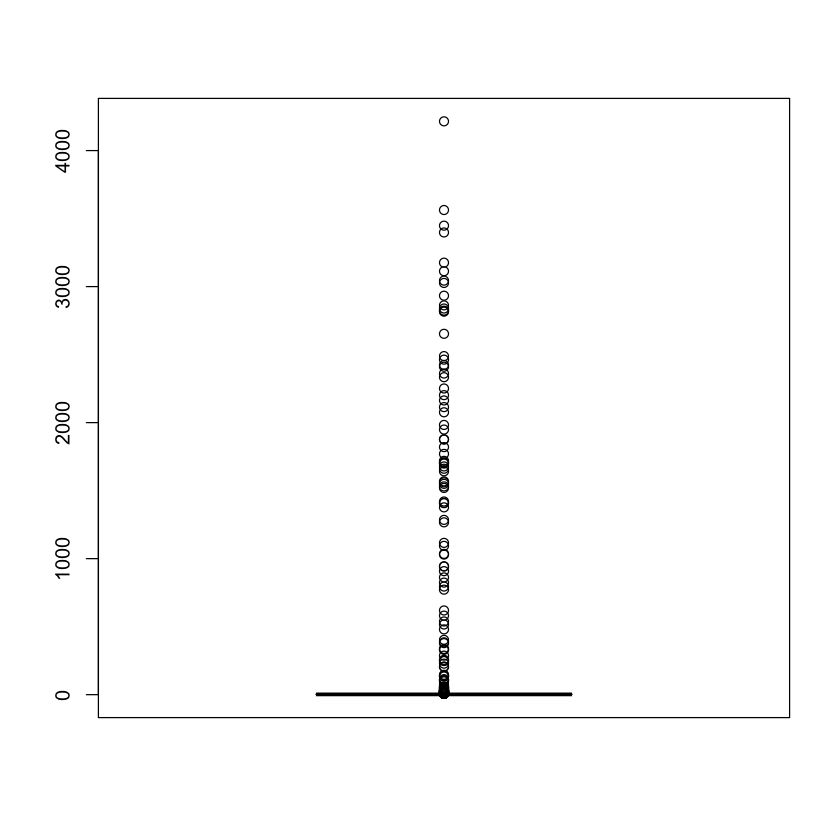

In [16]:
summary(x)
boxplot(x)
head(clean)
clean[clean$date_diff==4215,]

Warning message:
“Removed 35 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    2.00   17.96    2.00 4215.00 

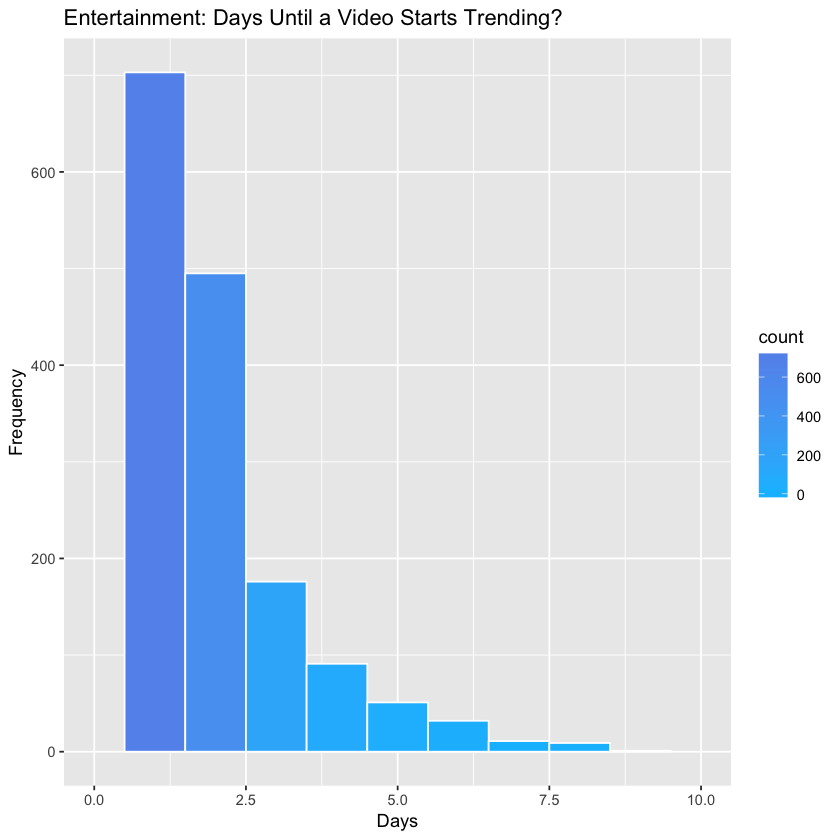

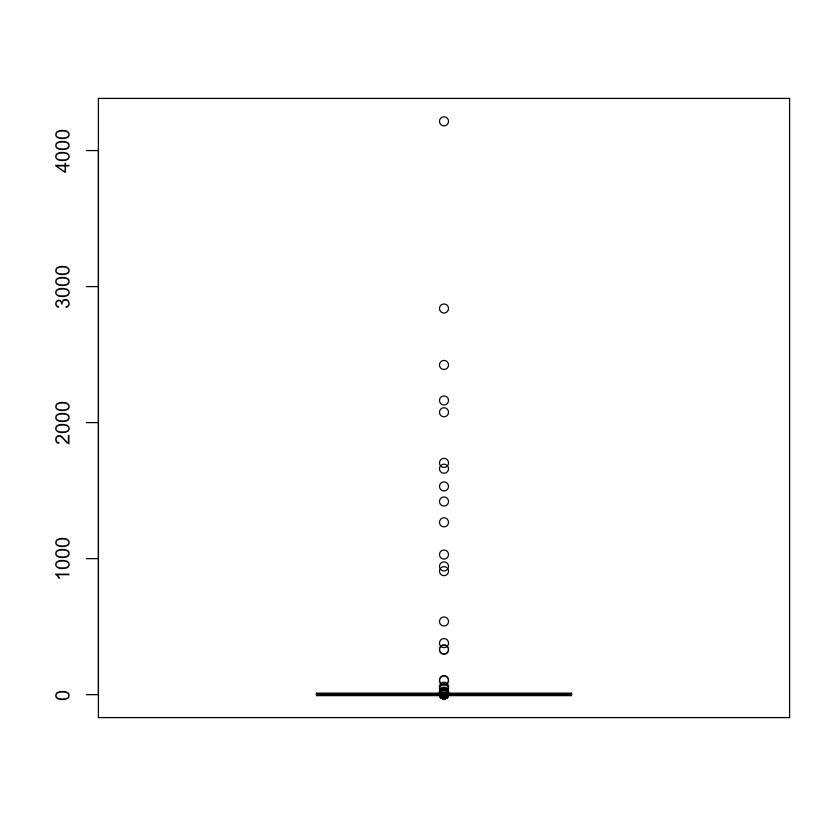

In [21]:
data24 <- clean[clean$category_id== '24',]
x24 <- as.numeric(data24$date_diff)
ggplot(data24, aes(x=x24)) + geom_histogram(binwidth= 1, color='white', aes(fill=..count..)) + labs(title = 'Entertainment: Days Until a Video Starts Trending?', x='Days', y='Frequency') + xlim(0,10) + scale_fill_gradient('count', low='deepskyblue', high='cornflowerblue')
summary(x24)
boxplot(x24)

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    2.00   22.34    3.00 3448.00 

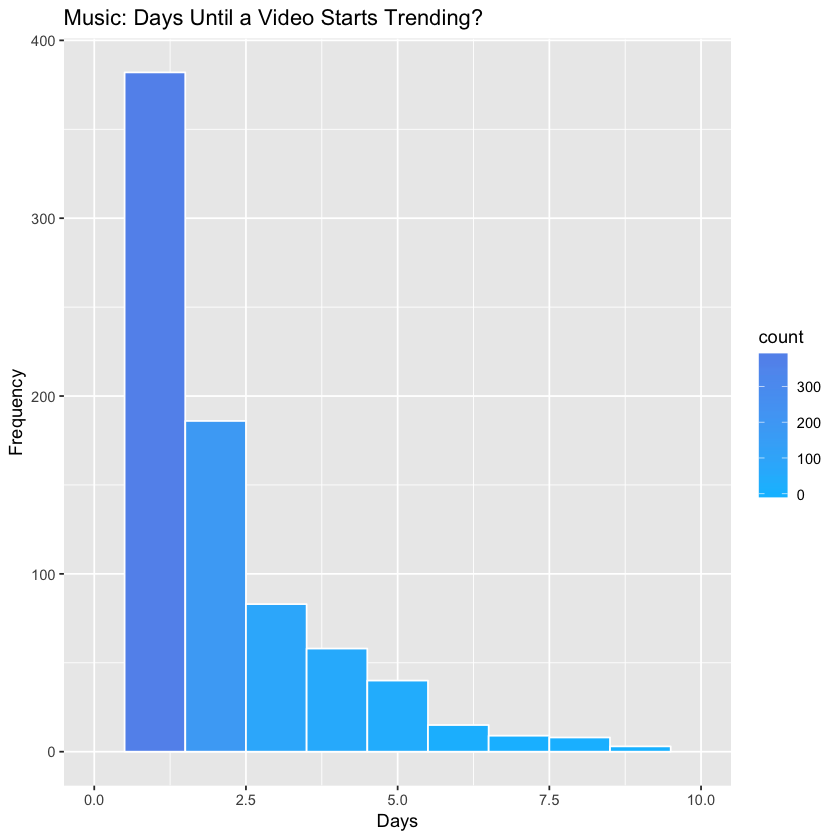

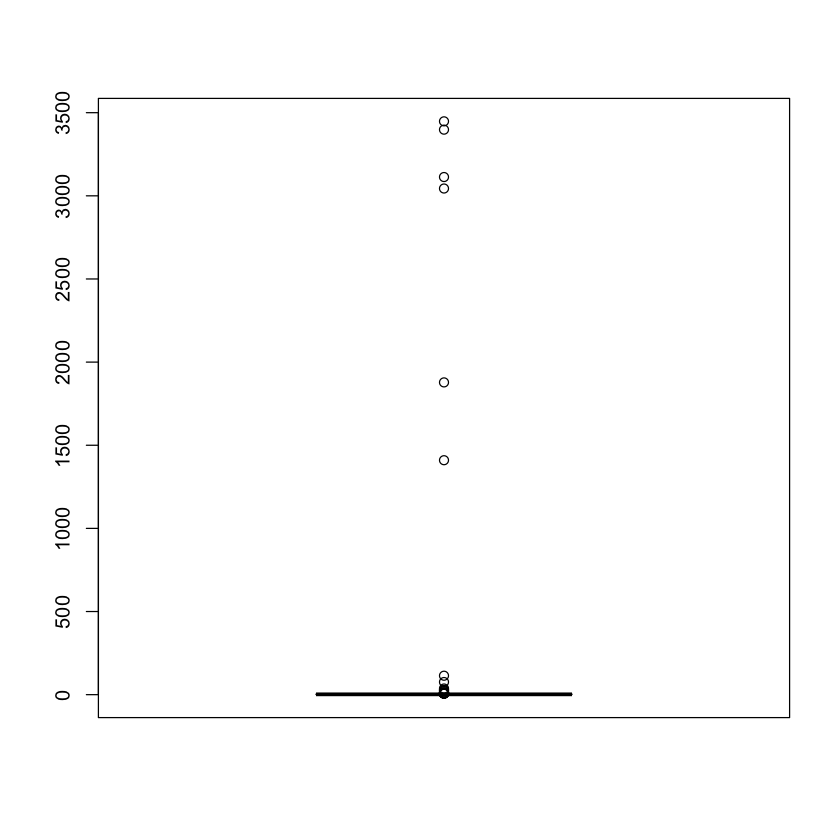

In [23]:
data10 <- clean[clean$category_id== '10',]
x10 <- as.numeric(data10$date_diff)
ggplot(data10, aes(x=x10)) + geom_histogram(binwidth= 1, color='white', aes(fill=..count..)) + labs(title = 'Music: Days Until a Video Starts Trending?', x='Days', y='Frequency') + xlim(0,10) + scale_fill_gradient('count', low='deepskyblue', high='cornflowerblue')
summary(x10)
boxplot(x10)

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   5.301   3.000 943.000 

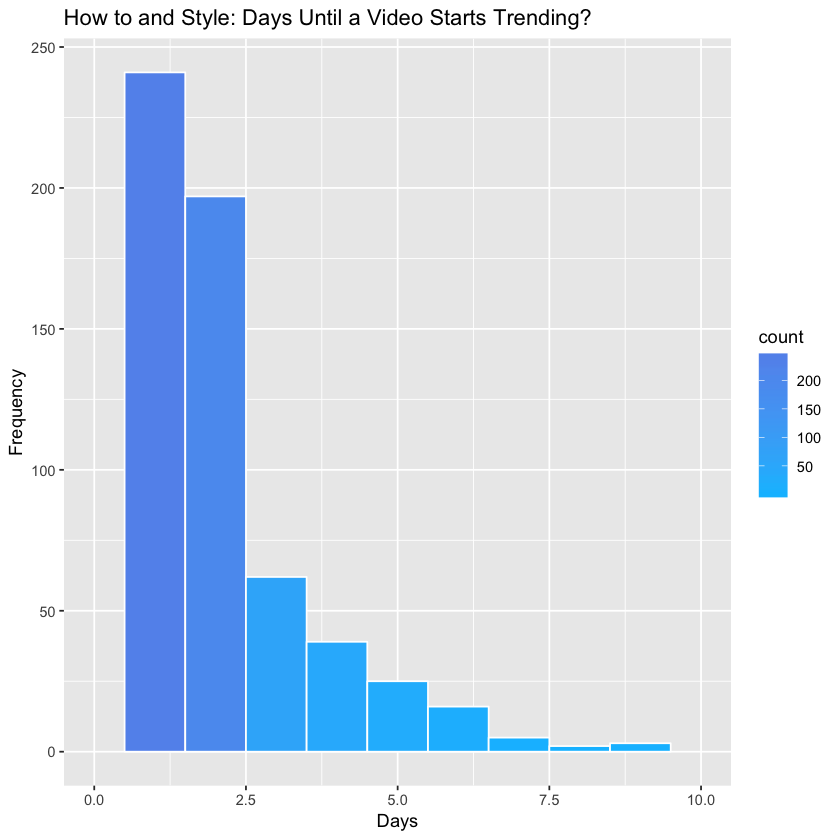

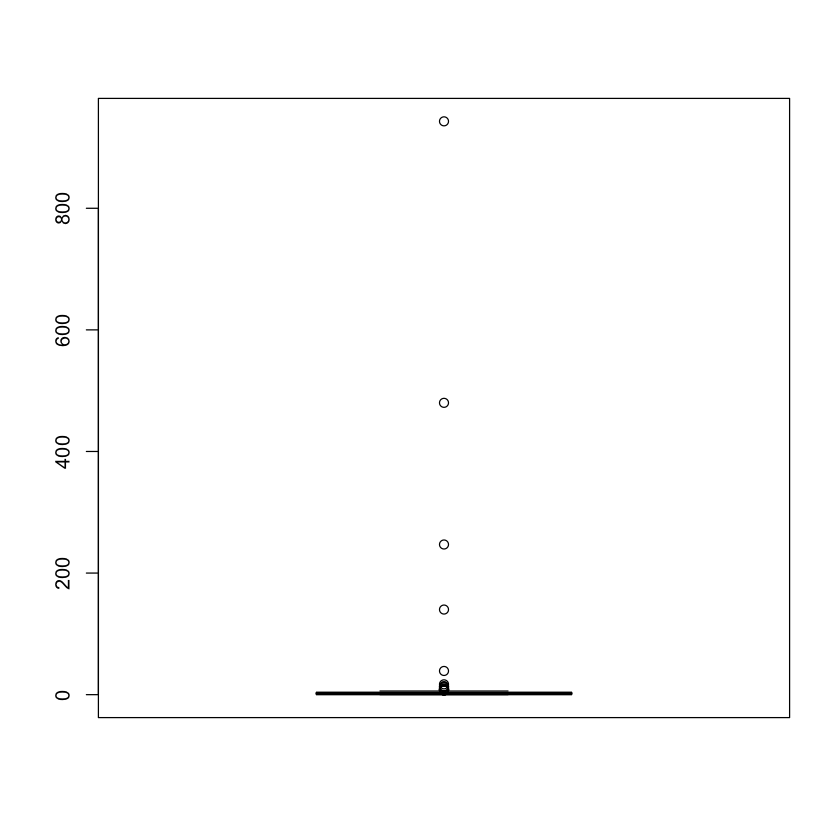

In [22]:
data26 <- clean[clean$category_id== '26',]
x26 <- as.numeric(data26$date_diff)
ggplot(data26, aes(x=x26)) + geom_histogram(binwidth= 1, color='white', aes(fill=..count..)) + labs(title = 'How to and Style: Days Until a Video Starts Trending?', x='Days', y='Frequency') + xlim(0,10) + scale_fill_gradient('count', low='deepskyblue', high='cornflowerblue')
 summary(x26)
boxplot(x26)